In [3]:
import numpy as np
import numpy.random as npr
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt

plt.style.use('seaborn')
%matplotlib inline

In [13]:
sample_size = 500
rn1 = npr.rand(sample_size, 3)
rn2 = npr.randint(0,10,sample_size)
rn3 = npr.sample(size=sample_size)
a = [0,15,25,35,45,55,100]
rn4 = npr.choice(a, size=sample_size)

Text(0, 0.5, 'frequency')

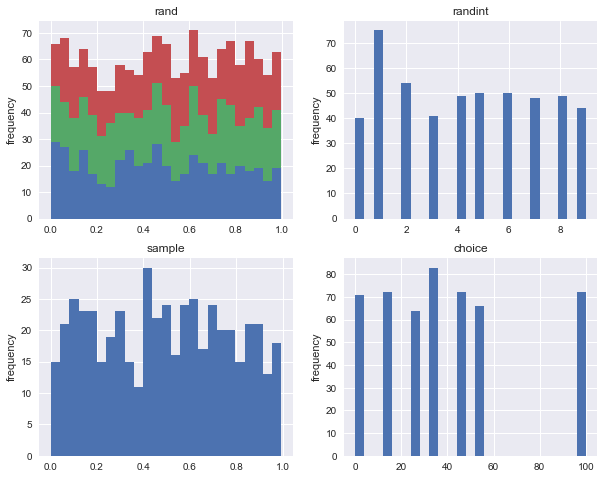

In [20]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(10,8))
ax1.hist(rn1, bins=25, stacked=True)
ax1.set_title('rand')
ax1.set_ylabel('frequency')
ax2.hist(rn2, bins=25)
ax2.set_title('randint')
ax2.set_ylabel('frequency')
ax3.hist(rn3, bins=25)
ax3.set_title('sample')
ax3.set_ylabel('frequency')
ax4.hist(rn4, bins=25)
ax4.set_title('choice')
ax4.set_ylabel('frequency')

In [33]:
sample_size=500
dist1 = npr.standard_normal(sample_size)
dist2 = npr.normal(100, 300, sample_size)
dist3 = npr.chisquare(df=0.5, size=sample_size)
dist4 = npr.poisson(lam=2.0, size= sample_size)

Text(0, 0.5, 'frequency')

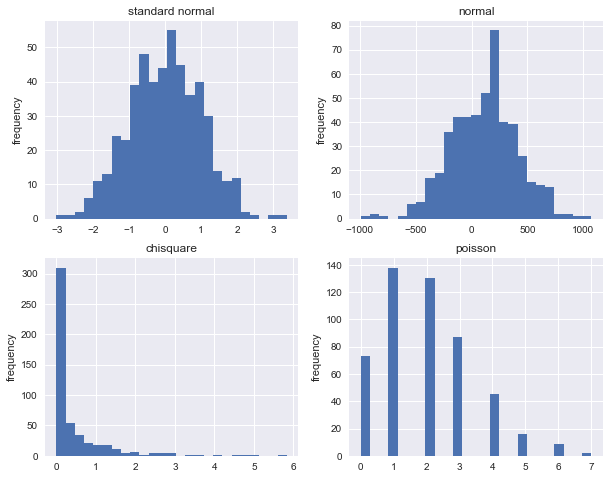

In [34]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(10,8))
ax1.hist(dist1, bins=25)
ax1.set_title('standard normal')
ax1.set_ylabel('frequency')
ax2.hist(dist2, bins=25)
ax2.set_title('normal')
ax2.set_ylabel('frequency')
ax3.hist(dist3, bins=25)
ax3.set_title('chisquare')
ax3.set_ylabel('frequency')
ax4.hist(dist4, bins=25)
ax4.set_title('poisson')
ax4.set_ylabel('frequency')

# Simulation

Monte Carlo  simulation(MCS)

## Balck-Scoles-Merton setup for option pricing. 
### Equation for simulating futre index level in BSM setup
*ST = S0 exp((r-0.5sigma^2)T + sigma *sqrt(T)z)*  
ST = index level at data T  
r = constant riskless short rate  
sigma = constant volatility (=standard deviation of returns) of S  
Z = standard normally distributed random variable  

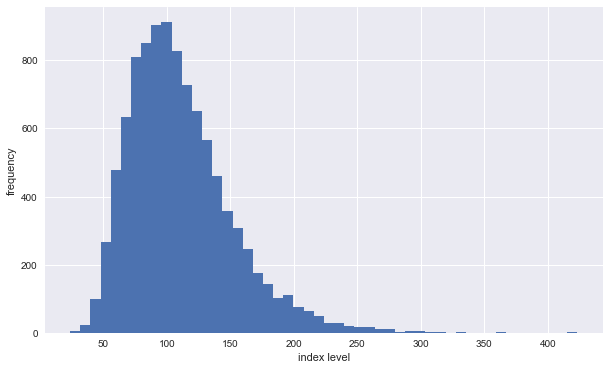

In [46]:
S0 = 100
r = 0.05
sigma = 0.25
T = 2.0
I = 10000 #number of simulation
ST1 = S0 * np.exp((r - 0.5 * sigma ** 2) * T +
     sigma * math.sqrt(T) * npr.standard_normal(I))

plt.figure(figsize=(10, 6))
plt.hist(ST1, bins=50)
plt.xlabel('index level')
plt.ylabel('frequency');

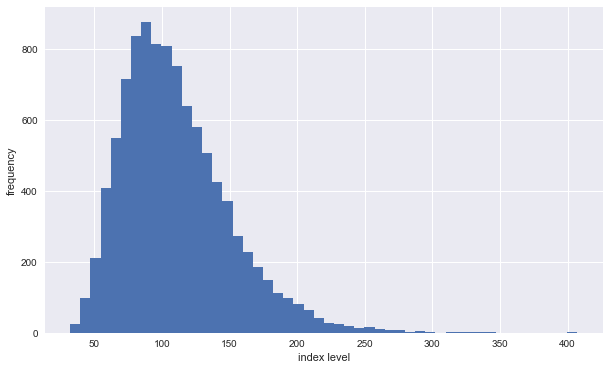

In [49]:
ST2 = S0 * npr.lognormal((r - 0.5 * sigma ** 2) * T,
     sigma * math.sqrt(T), size=I)
# use lognormal to directly derive the values for the random variable.
plt.figure(figsize=(10, 6))
plt.hist(ST2, bins=50)
plt.xlabel('index level')
plt.ylabel('frequency');

In [52]:
import scipy.stats as scs
def print_statistics(a1,a2):
    '''Prints selected statistics.
    a1, a2: ndarray objects results objects from simulation
    '''
    sta1 = scs.describe(a1)
    sta2 = scs.describe(a2)
    print('%14s %14s %14s' %
                 ('statistic', 'data set 1', 'data set 2'))
    print(45 * "-")
    print('%14s %14.3f %14.3f' % ('size', sta1[0], sta2[0]))
    print('%14s %14.3f %14.3f' % ('min', sta1[1][0], sta2[1][0]))
    print('%14s %14.3f %14.3f' % ('max', sta1[1][1], sta2[1][1]))
    print('%14s %14.3f %14.3f' % ('mean', sta1[2], sta2[2]))
    print('%14s %14.3f %14.3f' % ('std', np.sqrt(sta1[3]),
                               np.sqrt(sta2[3])))
    print('%14s %14.3f %14.3f' % ('skew', sta1[4], sta2[4]))
    print('%14s %14.3f %14.3f' % ('kurtosis', sta1[5], sta2[5]))

In [53]:
print_statistics(ST1, ST2)

     statistic     data set 1     data set 2
---------------------------------------------
          size      10000.000      10000.000
           min         24.027         32.038
           max        423.349        407.348
          mean        110.767        110.391
           std         40.482         39.937
          skew          1.107          1.072
      kurtosis          2.049          1.994


# Reflection

The differences are mainly due to what is called the sampling error in simulation. 
Another error can also be introduced when discretely simulating continuous stochastic processes: discretization error, which plays no role here due to the static nature of the simulation approach.

# Stochastic Processes

1. it is a sequence of random variables.
2. one should expect something similar to a sequence of repeated simulations of a rnadom variable when simulating a process.
3. Stochastic processes used in finance exhibit the Markov property
  1. tomorrow's value of the process only depends on today's state of the process, and not any other more "historic" state or even the whole path ihstory.
  2. The process is then called memoryless
4. Markov process
  1. discrete timee, discrete state space: CRR model
  2. discrete time, continuous state space: AR model
  3. continuous time, discrete state space: poisson process
  4. continuous time, continuous state space: Brownian Motion
5. 连续和离散的概念：我觉得老师解释的特别好借用一下“ 离散就是可数，连续就是不可数；

CRR :这个模型就是一个预测股价的模型，每个时间点要么up 要么down；所以时间点都是可数的，state space{up,down}; [公式] 所以说它是 离散时间；离散state space。

AR model: 不同时点构成的序列不同；所以这个时点是countable；但是state space无穷无尽（uncountable）

poisson process: 这个就比较熟悉一点了；一段时间间隔里上车的人数；他不是时间点，是一个interval，所以时间不可数（continuous time），但是上车的人数是可以数的（discrete state space）

brownian motion：下面详细讲

## Geometric Brownian motion

### Stochastic differential equation of geometric Brownian motion:
  ##### dS[t] = rS[t] dt + sigma(St)d(Z[t])
  
### Simulating index levels dynamically in Black-Scholes-Merton setup
  #### S[t] = S[t-1] exp( (r - 0.5sigma**2)*dt + sigma*sqrt(dt) z[t])
Zt is a standard Brownian motion.

Text(0, 0.5, 'frequency')

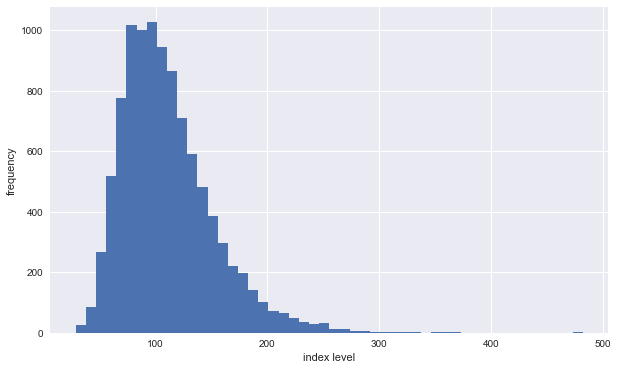

In [55]:
I = 10000 #number of paths to be simulated
M = 50 #number of time intervals for the discretization
dt = T/M #length of the time interval in year fractions
S = np.zeros((M+1, I))
S[0] = S0
for t in range(1, M+1):
    S[t] = S[t-1] * np.exp((r-0.5*sigma**2)*dt + sigma*math.sqrt(dt)*npr.standard_normal(I))
    
plt.figure(figsize=(10,6))
plt.hist(S[-1], bins=50)
plt.xlabel('index level')
plt.ylabel('frequency')

In [59]:
print_statistics(S[-1], ST2)

     statistic     data set 1     data set 2
---------------------------------------------
          size      10000.000      10000.000
           min         28.429         32.038
           max        482.285        407.348
          mean        110.669        110.391
           std         41.092         39.937
          skew          1.192          1.072
      kurtosis          2.628          1.994


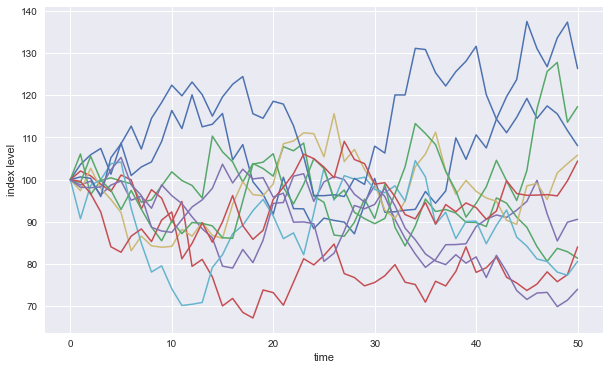

In [61]:
plt.figure(figsize=(10,6))
plt.plot(S[:,:10], lw=1.5)
plt.xlabel('time')
plt.ylabel('index level');

# Reflection
using the dynamic simulation approach not only allows us to visualuze paths as displayed in Figure, but also to value options with American/Bermudan exercise or options whose payoff is path-dependent.

# Square-root diffusion

1. Meean-reverting processes, whicha are used to model short rates or volatility processes
2. Many financial models (chi-squared distributed) can be discretized and approximated by using the normal distribution (i.e. Euler discretization scheme)


In [63]:
x0 = 0.05 #initial value for short rate
kappa = 3.0 #mean reversion factor
theta = 0.02 #long-term mean value
sigma = 0.1 #volatility factor
I = 10000
M = 50
dt = T / M

def srd_euler():
    xh = np.zeros((M+1, I))
    x = np.zeros_like(xh)
    xh[0] = x0
    x[0] = x0
    for t in range(1, M + 1):
                 xh[t] = (xh[t - 1] +
                          kappa * (theta - np.maximum(xh[t - 1], 0)) * dt +
                          sigma * np.sqrt(np.maximum(xh[t - 1], 0)) *
                          math.sqrt(dt) * npr.standard_normal(I))
    x = np.maximum(xh, 0)
    return x
x1 = srd_euler()

Text(0.5, 0.98, 'Simulation based on an Euler scheme')

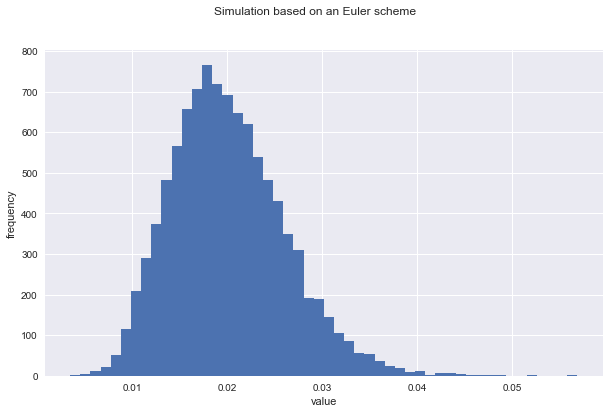

In [72]:
plt.figure(figsize=(10, 6))
plt.hist(x1[-1], bins=50)
plt.xlabel('value')
plt.ylabel('frequency');
plt.suptitle('Simulation based on an Euler scheme')

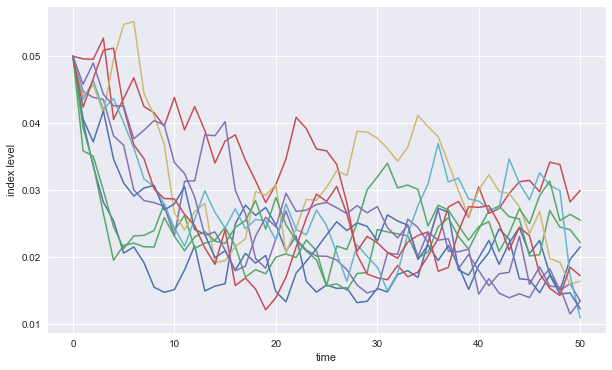

In [75]:
plt.figure(figsize=(10, 6))
plt.plot(x1[:, :10], lw=1.5)
plt.xlabel('time')
plt.ylabel('index level');

In [82]:
def srd_exact():
    x = np.zeros((M + 1, I))
    x[0] = x0
    for t in range(1, M + 1):
        df = 4 * theta * kappa / sigma ** 2
        c = (sigma ** 2 * (1 - np.exp(-kappa * dt))) / (4 * kappa)
        nc = np.exp(-kappa * dt) / c * x[t - 1]
        x[t] = c * npr.noncentral_chisquare(df, nc, size=I) 
    return x

x2 = srd_exact()

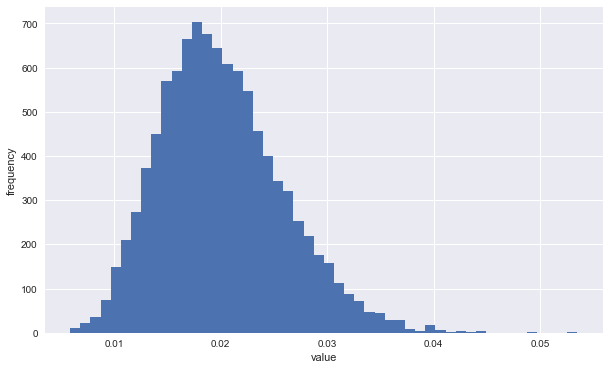

In [83]:
plt.figure(figsize=(10, 6))
plt.hist(x2[-1], bins=50)
plt.xlabel('value')
plt.ylabel('frequency');

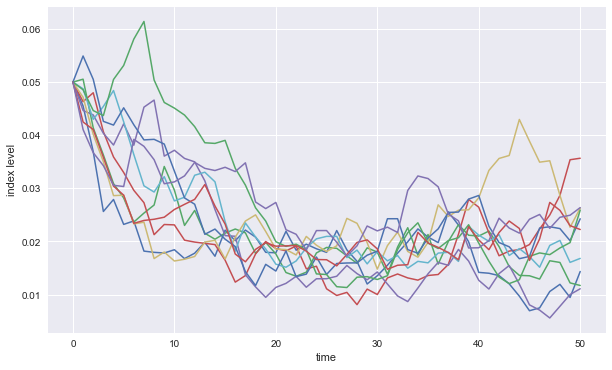

In [84]:
plt.figure(figsize=(10, 6))
plt.plot(x2[:, :10], lw=1.5)
plt.xlabel('time')
plt.ylabel('index level');

# Stochastic volatility

1. major simplifying assumptions of the Black-Scholes-Merton model is the constant volatility
2. volatility in general is neither constant nor deterministic -- it is stochastic

# Variance Reduction
1. python function generate pseudo-random numbers and due to the varying sizes of the samples drawn, the resulting sets of numbers might not exhibit statistics close enough to the expected or desired ones.
2. Our expectation: a set of stnadard normally distributed random numbers to show a mean of 0 and a standard deviation of 1.

In [85]:
print('%15s %15s' % ('Mean', 'Std. Deviation'))
print(31 * '-')
for i in range(1, 31, 2):
    npr.seed(100)
    sn = npr.standard_normal(i ** 2 * 10000)
    print('%15.12f %15.12f' % (sn.mean(), sn.std()))

           Mean  Std. Deviation
-------------------------------
 0.001150944833  1.006296354600
 0.002841204001  0.995987967146
 0.001998082016  0.997701714233
 0.001322322067  0.997771186968
 0.000592711311  0.998388962646
-0.000339730751  0.998399891450
-0.000228109010  0.998657429396
 0.000295768719  0.998877333340
 0.000257107789  0.999284894532
-0.000357870642  0.999456401088
-0.000528443742  0.999617831131
-0.000300171536  0.999445228838
-0.000162924037  0.999516059328
 0.000135778889  0.999611052522
 0.000182006048  0.999619405229


1. to solve th eproblem, generic variance reduction techniques are used to improve the matching of the first two moments of the standard normal distribution.
  1. antithetic variates
      1. draws only half the desired number of random draws, and adds the same set of random numbers with the opposite sign afterward
      2. eg. 0.5.append(-0.5) => mean value of such a dataset must equal 0
      3. drawback: does not have any influence on the second moment, the standard deviation
  2. Moment matching
      1. substracting the mean from every single random number and dividing every single number by the standard deviation
      2. ensures that the set of random numbers matches the desired first and second moments of the standard normal distribution perfectly.

In [86]:
print('%15s %15s' % ('Mean', 'Std. Deviation'))
print(31 * "-")
for i in range(1, 31, 2):
    npr.seed(1000)
    sn = npr.standard_normal(i ** 2 * int(10000 / 2))
    sn = np.concatenate((sn, -sn))
    print("%15.12f %15.12f" % (sn.mean(), sn.std()))

           Mean  Std. Deviation
-------------------------------
 0.000000000000  1.009653753942
-0.000000000000  1.000413716783
 0.000000000000  1.002925061201
-0.000000000000  1.000755212673
 0.000000000000  1.001636910076
-0.000000000000  1.000726758438
-0.000000000000  1.001621265149
 0.000000000000  1.001203722778
-0.000000000000  1.000556669784
-0.000000000000  1.000113464185
-0.000000000000  0.999435175324
-0.000000000000  0.999356961431
-0.000000000000  0.999641436845
-0.000000000000  0.999642768905
-0.000000000000  0.999638303451


In [87]:
def gen_sn(M, I, anti_paths=True, mo_match=True):
    ''' Function to generate random numbers for simulation.

    Parameters
    ==========
    M: int
     number of time intervals for discretization
    I: int
     number of paths to be simulated
    anti_paths: boolean
     use of antithetic variates
    mo_math: boolean
     use of moment matching
    '''
    if anti_paths is True:
        sn = npr.standard_normal((M + 1, int(I / 2)))
        sn = np.concatenate((sn, -sn), axis=1)
    else:
        sn = npr.standard_normal((M + 1, I))
    if mo_match is True:
        sn = (sn - sn.mean()) / sn.std()
    return sn

# Risk Measures

1. Value-at-RIsk
  1. it is a number denoted in currency units indicating a loss (of a portfolio, a single position) that is not exceeded with some condifdence level over a given period of time
  2. black-scholes-merton setup to simulate absolute profits and losses relative to the value of the position today in a sorted manner

In [88]:
S0 = 100
r= 0.05
sigma = 0.25
T = 30/365.
I = 10000

ST = S0 * np.exp((r - 0.5 * sigma ** 2) * T +
                      sigma * np.sqrt(T) * npr.standard_normal(I))
# simulates end-of-period values for the geometric Brownian motion.

In [91]:
R_gbm = np.sort(ST - S0) #calculates the absolute profits and losses per simulation run and sorts the values.

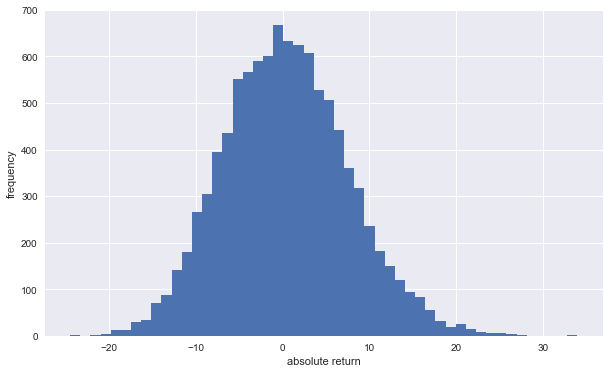

In [92]:
plt.figure(figsize=(10, 6))
plt.hist(R_gbm, bins=50)
plt.xlabel('absolute return')
plt.ylabel('frequency');

In [93]:
percs = [0.01, 0.1, 1., 2.5, 5.0, 10.0]
var = scs.scoreatpercentile(R_gbm, percs)
print('%16s %16s' % ('Confidence Level', 'Value-at-Risk'))
print(33 * '-')
for pair in zip(percs, var):
     print('%16.2f %16.3f' % (100 - pair[0], -pair[1]))

Confidence Level    Value-at-Risk
---------------------------------
           99.99           21.063
           99.90           19.196
           99.00           14.927
           97.50           12.818
           95.00           10.856
           90.00            8.581


Text(0.5, 0.98, 'Absolute profits and losses from simulation(jump diffusion)')

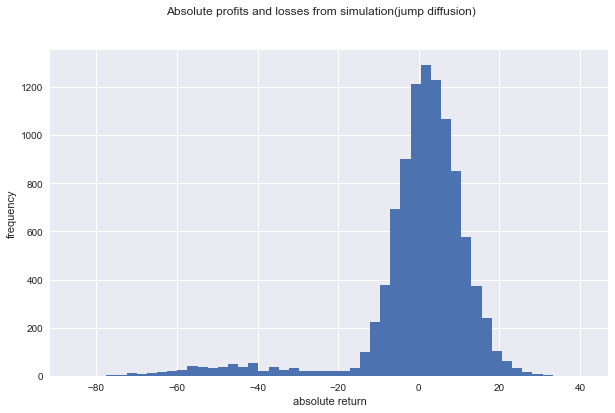

In [100]:
dt = 30. / 365 / M
lamb = 0.75
mu = -0.6
delta = 0.25
rj = lamb * (math.exp(mu + 0.5 * delta ** 2) - 1)

S = np.zeros((M + 1, I))
S[0] = S0
sn1 = npr.standard_normal((M + 1, I))
sn2 = npr.standard_normal((M + 1, I))
poi = npr.poisson(lamb * dt, (M + 1, I))
for t in range(1, M + 1, 1):
         S[t] = S[t - 1] * (np.exp((r - rj - 0.5 * sigma ** 2) * dt
                            + sigma * math.sqrt(dt) * sn1[t])
                            + (np.exp(mu + delta * sn2[t]) - 1)
                            * poi[t])
         S[t] = np.maximum(S[t], 0)

R_jd = np.sort(S[-1] - S0)

plt.figure(figsize=(10, 6))
plt.hist(R_jd, bins=50)
plt.xlabel('absolute return')
plt.ylabel('frequency');
plt.suptitle('Absolute profits and losses from simulation(jump diffusion)')

In [101]:
percs = [0.01, 0.1, 1., 2.5, 5.0, 10.0]
var = scs.scoreatpercentile(R_jd, percs)
print('%16s %16s' % ('Confidence Level', 'Value-at-Risk'))
print(33 * '-')
for pair in zip(percs, var):
     print('%16.2f %16.3f' % (100 - pair[0], -pair[1]))

Confidence Level    Value-at-Risk
---------------------------------
           99.99           77.338
           99.90           72.072
           99.00           57.272
           97.50           47.188
           95.00           29.713
           90.00            9.068


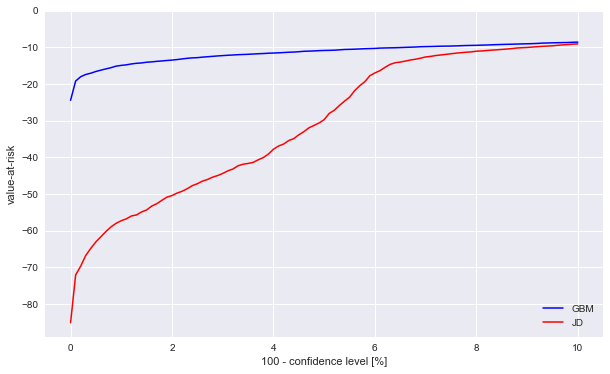

In [103]:
percs = list(np.arange(0.0, 10.1, 0.1))
gbm_var = scs.scoreatpercentile(R_gbm, percs)
jd_var = scs.scoreatpercentile(R_jd, percs)
# value-at-risk for geometric Brownian motion and jump diffusion

plt.figure(figsize=(10, 6))
plt.plot(percs, gbm_var, 'b', lw=1.5, label='GBM')
plt.plot(percs, jd_var, 'r', lw=1.5, label='JD')
plt.legend(loc=4)
plt.xlabel('100 - confidence level [%]')
plt.ylabel('value-at-risk')
plt.ylim(ymax=0.0);

# Credit Valuation Adjustments
1. CVA, which is derived from the Credit value-at-risk (CVaR)
2. CVaR is a measure for the risk resulting from the possibility that a counterparty  might not be able to honor its obligation (eg. If the counterparty goes bankrupt.)
3. 2 main assumptions to be made:
    a. The probability of default
    b. The average loss level


In [104]:
S0 = 100.
r = 0.05
sigma = 0.2
T = 1.
I = 100000

ST = S0 * np.exp((r - 0.5 * sigma ** 2) * T
                       + sigma * np.sqrt(T) * npr.standard_normal(I))
L = 0.5 # loss level

p = 0.01 #defines the probability of default

D = npr.poisson(p * T, I) #simulates default events

D = np.where(D > 1, 1, D) #limits defaults to one such event

In [108]:
math.exp(-r * T) * np.mean(ST) #discounted average simulated value of the asset of T
CVaR = math.exp(-r * T) * np.mean(L * D * ST) #CVaR as the discounted average of the future losses in the case of default
S0_CVA = math.exp(-r * T) * np.mean((1 - L * D) * ST) #Disocunted average simulated value of the asset at T, adjusted for the simlauted losses from default
S0_adj = S0 - CVaR #Current price of the asset adjusted by the simulated CVaR
print(CVaR, S0_CVA, S0_adj)

0.5068759219099245 99.53596516050618 99.49312407809008


In [109]:
np.count_nonzero(L * D * ST)

1005

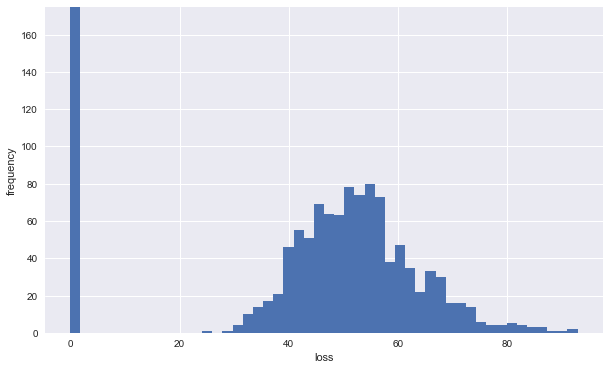

In [111]:
plt.figure(figsize=(10, 6))
plt.hist(L * D * ST, bins=50)
plt.xlabel('loss')
plt.ylabel('frequency')
plt.ylim(ymax=175);

# Conclusion
Roughly 1,000 losses due to credit risk, which is to be expected given the assumed default probability of 1% and the 100,000 simulated paths

In [112]:
#
# Valuation of European call options
# in Black-Scholes-Merton model
# incl. vega function and implied volatility estimation
# bsm_functions.py
#
# (c) Dr. Yves J. Hilpisch
# Python for Finance, 2nd ed.
#


def bsm_call_value(S0, K, T, r, sigma):
    ''' Valuation of European call option in BSM model.
    Analytical formula.

    Parameters
    ==========
    S0: float
        initial stock/index level
    K: float
        strike price
    T: float
        maturity date (in year fractions)
    r: float
        constant risk-free short rate
    sigma: float
        volatility factor in diffusion term

    Returns
    =======
    value: float
        present value of the European call option
    '''
    from math import log, sqrt, exp
    from scipy import stats

    S0 = float(S0)
    d1 = (log(S0 / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * sqrt(T))
    d2 = (log(S0 / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * sqrt(T))
    # stats.norm.cdf --> cumulative distribution function
    #                    for normal distribution
    value = (S0 * stats.norm.cdf(d1, 0.0, 1.0) -
             K * exp(-r * T) * stats.norm.cdf(d2, 0.0, 1.0))
    return value


def bsm_vega(S0, K, T, r, sigma):
    ''' Vega of European option in BSM model.

    Parameters
    ==========
    S0: float
        initial stock/index level
    K: float
        strike price
    T: float
        maturity date (in year fractions)
    r: float
        constant risk-free short rate
    sigma: float
        volatility factor in diffusion term

    Returns
    =======
    vega: float
        partial derivative of BSM formula with respect
        to sigma, i.e. vega

    '''
    from math import log, sqrt
    from scipy import stats

    S0 = float(S0)
    d1 = (log(S0 / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * sqrt(T))
    vega = S0 * stats.norm.pdf(d1, 0.0, 1.0) * sqrt(T)
    return vega

# Implied volatility function


def bsm_call_imp_vol(S0, K, T, r, C0, sigma_est, it=100):
    ''' Implied volatility of European call option in BSM model.

    Parameters
    ==========
    S0: float
        initial stock/index level
    K: float
        strike price
    T: float
        maturity date (in year fractions)
    r: float
        constant risk-free short rate
    sigma_est: float
        estimate of impl. volatility
    it: integer
        number of iterations

    Returns
    =======
    simga_est: float
        numerically estimated implied volatility
    '''
    for i in range(it):
        sigma_est -= ((bsm_call_value(S0, K, T, r, sigma_est) - C0) /
                      bsm_vega(S0, K, T, r, sigma_est))
    return sigma_est

# Capital Management
## Kelly Criterion 
1.  f* = p - q per round of betting

In [4]:
import math
import time
import numpy as np
import pandas as pd
import datetime as dt
import cufflinks as cf
import matplotlib.pyplot as plt
np.random.seed(1000)
plt.style.use('seaborn')
%matplotlib inline

In [6]:
p = 0.55
f = p - (1-p) # optimal fraction according to Kelly criterion
I = 50 # number of series to be simulated
n = 100 # number of trials per series

In [7]:
def run_simulation(f):
    c = np.zeros((n, I))
    c[0] = 100
    for i in range(I):
        for t in range(1,n):
            o = np.random.binomial(1, p)
            if o>0:
                c[t,i] = (1+f) * c[t-1, i] # add the win to the capital
            else:
                c[t, i] = (1-f) * c[t-1, i] #substract the loss from capital
    return c

c_1 = run_simulation(f)
c_1.round(2)

array([[100.  , 100.  , 100.  , ..., 100.  , 100.  , 100.  ],
       [ 90.  , 110.  ,  90.  , ..., 110.  ,  90.  , 110.  ],
       [ 99.  , 121.  ,  99.  , ..., 121.  ,  81.  , 121.  ],
       ...,
       [226.35, 338.13, 413.27, ..., 123.97, 123.97, 123.97],
       [248.99, 371.94, 454.6 , ..., 136.37, 136.37, 136.37],
       [273.89, 409.14, 409.14, ..., 122.73, 150.01, 122.73]])

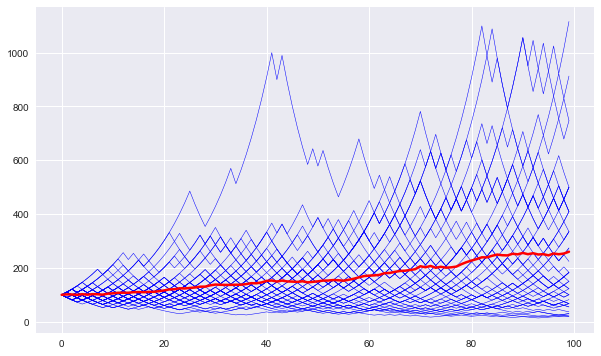

In [9]:
plt.figure(figsize=(10,6))
plt.plot(c_1, 'b', lw=0.5)
plt.plot(c_1.mean(axis=1), 'r', lw=2.5)

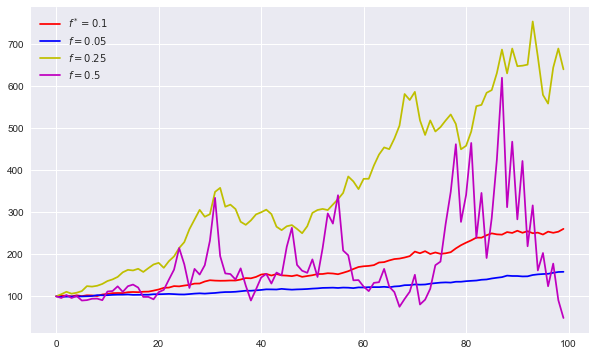

In [10]:
c_2 = run_simulation(0.05)
c_3 = run_simulation(0.25)
c_4 = run_simulation(0.5)
# lower fraction leads to a lower grouwth rate on average, 
# Higher fraction may lead to a higher average capital at the end of simulation or
# a much lower average capital
# fraction is higher, the volatility increases

plt.figure(figsize=(10,6))
plt.plot(c_1.mean(axis=1), 'r', label='$f^*=0.1$')
plt.plot(c_2.mean(axis=1), 'b', label='$f=0.05$')
plt.plot(c_3.mean(axis=1), 'y', label='$f=0.25$')
plt.plot(c_4.mean(axis=1), 'm', label='$f=0.5$')
plt.legend(loc=0);

### hit ratio of the tradong strategy: the number of winning trades compared to all trades

# Limitation of vectorized backtesting
1.  it does not allow direct inclusion of fixed transaction costs per trade

# Risk Analysis
Since leverage increases the risk associated with at trading strategy, a more in-depth risk analysis seems ion order.
1. Maximum drawdown: largest loss (dip) after a recent high.
2.  longest dradown period is the longest period that the trading strategy needs to get back to recent high.